# End to End WebLoader RAG - Using Groq, Datastax Db with Cassio

## Application Development steps:

1. Importing the neccesary langChain, GROQ, Datastax cassandra & Embeddings.
2. Setting the Groq API & Astra DB API as enviroment along with DB ID.
3. Initializing the webBaseLoader to read the ample amount data from the given the web app.
4. Then, doing the chunks & splitting the documents before embeddings.
5. Now, embedding the given chunk of data and storing it into the astra_vector_store.
6. As it's huge amount of data, we're using the AstraDB to store all the vector data in there.
7. Then, creating the open source LLM Model using Groq API Inferencing.
8. Creating the ChatPromptTemplate with some prompt comments, to equip the search level to next state.(It behaves as clue while searching)
9. Simple Querying using the astra_vector_db along with LLM. (But it's jus refers only the DB data as prime source.)
10. Creaing the retriever chain using "create_stuff_documents_chain". Vectore db as retriever & document chain as LLM & prompt and creating the stuff document chain to execute in the life cycle.

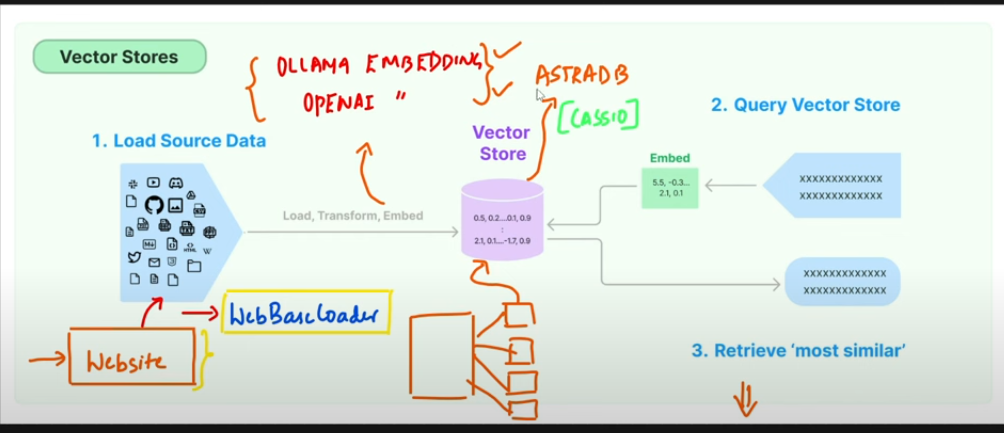
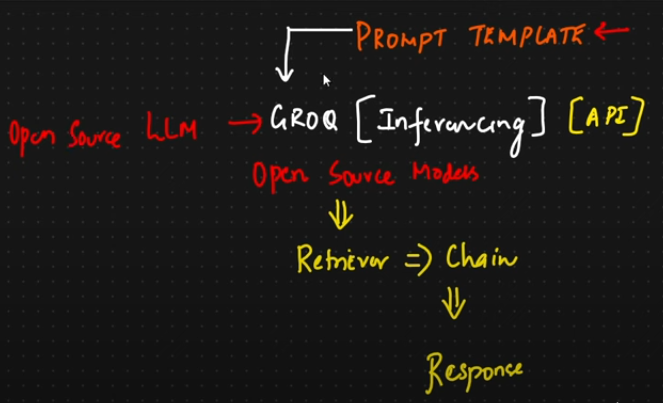


In [2]:
!pip install langchain_groq langchain_community cassio python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3

## Imporing the LangChain, AstraDB, WebBaseLoader

In [3]:
import os
from langchain_groq import ChatGroq
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.embeddings import OpenAIEmbeddings
from langchain.vectorstores.cassandra import Cassandra
import cassio
from dotenv import load_dotenv
load_dotenv()

False

## Initializing the Groq API & AstraDB.
Groq: https://console.groq.com/playground

DATASTAX: https://astra.datastax.com/org/0a7967c0-8fdd-456d-9e7a-a9a38bc9d786/settings/tokens

In [8]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API')
os.environ['GROQ_API_KEY'] = groq_api_key

## connection of the ASTRA DB
ASTRA_DB_APPLICATION_TOKEN="AstraCS:eaLGiEBHmzRUgoYHNqWvkrFr:37e60fa387ac47503c88d3e04a3473999af634a7975691ef8b0898a8eb128241" # enter the "AstraCS:..." string found in in your Token JSON file"
ASTRA_DB_ID="e2d177bf-af1f-481a-a637-2e5c24fe1e20"
cassio.init(token=ASTRA_DB_APPLICATION_TOKEN,database_id=ASTRA_DB_ID)

ValueError: Generic error when fetching the URL to the secure-bundle.

## Creating the webBaseLoader along with BeautifulSoup to extract the contents from web app

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
import bs4
loader=WebBaseLoader(web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
                     bs_kwargs=dict(parse_only=bs4.SoupStrainer(
                         class_=("post-title","post-content","post-header")

                     )))

text_documents=loader.load()

In [ ]:
text_documents

[Document(page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final re

## Splitting the contents into chunks

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
docs=text_splitter.split_documents(text_documents)
docs[:5]

[Document(page_content='LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n

## Doing the embeddings and converting them as vector data

In [ ]:
## Convert Data Into Vectors and store in AstraDB
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
embeddings=OpenAIEmbeddings()
astra_vector_store=Cassandra(
    embedding=embeddings,
    table_name="qa_mini_demo",
    session=None,
    keyspace=None

)

## Adding the chunk data into the AstraDB using the VectorStoreIndexWrapper

In [ ]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_store.add_documents(docs)
print("Inserted %i headlines." % len(docs))

astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

Inserted 66 headlines.


## Creating the LLM object using opensource LLMs using the Groq API inference.

In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key,
         model_name="mixtral-8x7b-32768")

from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context.
Think step by step before providing a detailed answer.
I will tip you $1000 if the user finds the answer helpful.
<context>
{context}
</context>

Question: {input}""")

## Generice Query using with vector store data

In [ ]:
astra_vector_index.query("Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique",llm=llm)

'Chain of Thought (CoT) is a prompting technique introduced by Wei et al. in 2022 that has become a standard method for enhancing model performance on complex tasks. The main idea behind CoT is to instruct the model to "think step by step," thereby utilizing more computational resources during test time. This approach decomposes complex tasks into smaller, more manageable steps, providing insights into the model\'s thinking process. By breaking down tasks and generating step-by-step solutions, CoT has proven to be an effective technique for addressing complex problems within the limitations of the model\'s capabilities.'

## Creating the retriever document chain to handle the life cycle.

In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain

retriever=astra_vector_store.as_retriever()
document_chain=create_stuff_documents_chain(llm,prompt)
retrieval_chain=create_retrieval_chain(retriever,document_chain)

In [ ]:
response=retrieval_chain.invoke({"input":"Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique"})
response

{'input': 'Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique',
 'context': [Document(page_content='Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.\nTask decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}),
  Document(page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually invo

In [ ]:
response["answer"]

'The Chain of Thought (CoT) is a standard prompting technique introduced by Wei et al. in 2022, which enhances model performance on complex tasks. The main idea behind CoT is to instruct the model to "think step by step," thereby utilizing more test-time computation to decompose hard tasks into smaller and more manageable tasks. This approach sheds light on the model\'s thinking process and transforms complex tasks into a series of simpler, more approachable sub-tasks.\n\nIn the context of AI and language models, the CoT technique helps to break down complex problems into a chain of smaller, interconnected thoughts, allowing the model to tackle each step more effectively. This method can be applied to various tasks, such as mathematical problem-solving, text generation, or understanding complex instructions. By following the chain of thought, the model can better navigate complex problem-solving scenarios, making it a valuable tool for improving language model performance and understan